### Import Libraries and Set Plotly Theme and Style

In [1]:
# data
import numpy as np
import pandas as pd
# !pip install missingno
# !pip install wordcloud

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

df=pd.read_csv('Qaran_jobs_raw.csv')

### Print Data Shape

In [2]:
print(df.shape)
df.tail(3)

(3720, 6)


title  \
3717  Planning Consultant Dhusamareb, Galmudug, Somalia   
3718                                    Young graduate    
3719                                    Gender Advisor    

                         company                       location  \
3717  Galmudug State of Somalia   Dhusamareb, Galmudug, Somalia   
3718  Galmudug State of Somalia     Abudwak – Galmudug, Somalia   
3719  Galmudug State of Somalia   Dhusamareb, Galmudug, Somalia   

              posted                                                url  stem  
3717   April 7, 2022  https://qaranjobs.com/job/planning-consultant-...     0  
3718   April 7, 2022  https://qaranjobs.com/job/young-graduate-plann...     0  
3719   April 7, 2022  https://qaranjobs.com/job/gender-advisor-dhusa...     0

### Distribution of Missing Values

Text(0.5, 1.0, 'Distribution of Missing Values')

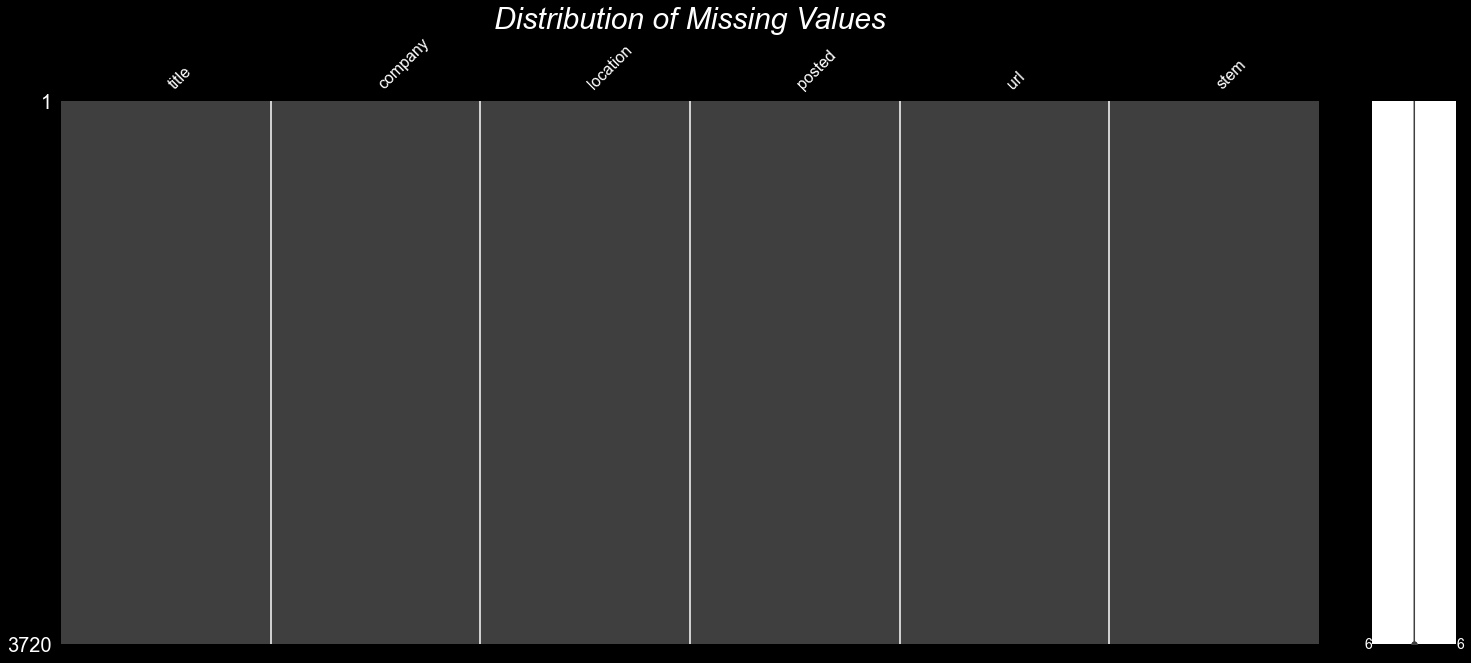

In [3]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')

### Unique Job Titles

In [4]:
print('how many job titles in the dataset: ',df['title'].value_counts().size)

how many job titles in the dataset:  2799


### Top 10 Job Titles

In [5]:
top10_job_title = df['title'].value_counts()[:10]
# print(top10_job_title)
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### Job Titles WordCloud

In [6]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


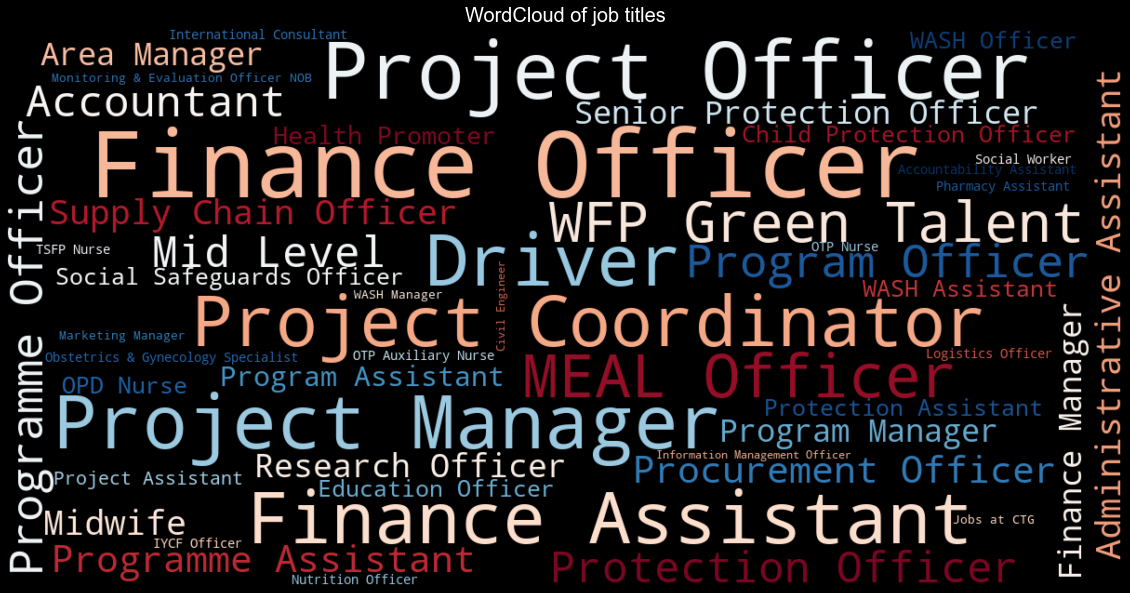

In [7]:
freq_df = Freq_df(df['title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

### Top 10 Companies

In [20]:
top10_job_title = df['company'].value_counts()[:10]
# print(top10_job_title)
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Companies',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### Companies WordCloud

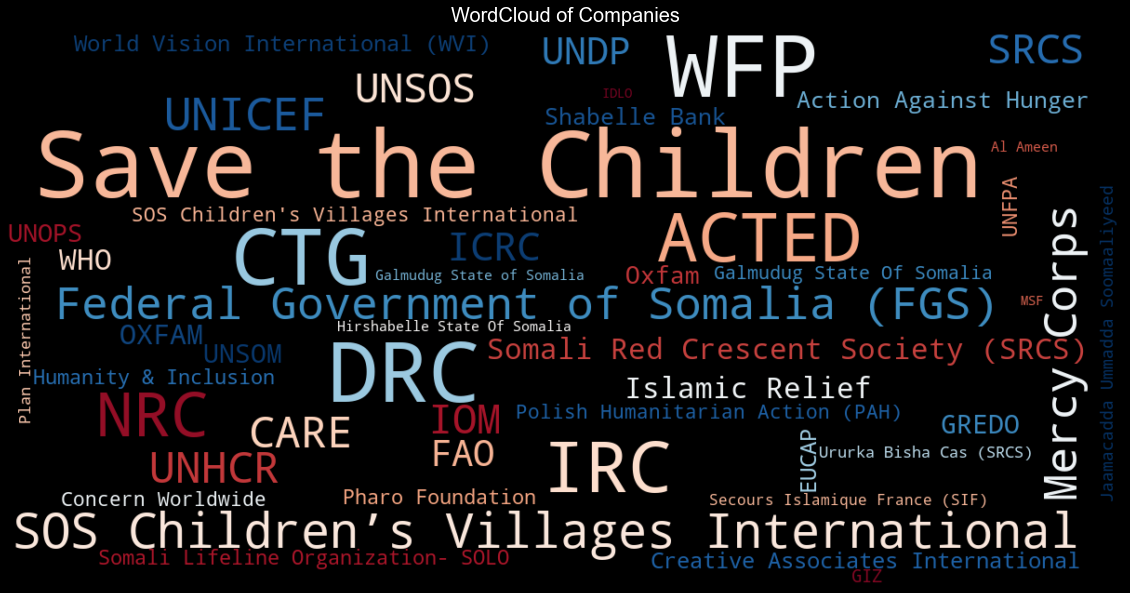

In [11]:
freq_df = Freq_df(df['company'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of Companies')

### Convert Posted Column to Datetime

In [12]:
#Convert Posted Column to Datetime and get month and year for each vale
df["posted"]=pd.to_datetime(df["posted"])
df['MonthYear'] = df['posted'].dt.strftime('%B-%Y')
df["MonthYear"]=pd.to_datetime(df["MonthYear"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      3720 non-null   object        
 1   company    3720 non-null   object        
 2   location   3720 non-null   object        
 3   posted     3720 non-null   datetime64[ns]
 4   url        3720 non-null   object        
 5   stem       3720 non-null   int64         
 6   MonthYear  3720 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 203.6+ KB
None


### Monthly Job Distribution

In [13]:
df_date = df.set_index('posted', inplace=False)
df_month = df_date.resample('M').sum()
df_month['stem']

posted
2022-04-30    1
2022-05-31    2
2022-06-30    4
2022-07-31    2
2022-08-31    0
2022-09-30    5
2022-10-31    0
2022-11-30    0
2022-12-31    1
2023-01-31    2
2023-02-28    1
2023-03-31    6
2023-04-30    6
2023-05-31    6
Freq: M, Name: stem, dtype: int64

In [17]:
# Extract the month and year from the 'posted' column
df['month_year'] = df['posted'].dt.strftime('%B %Y')

# Calculate the count of jobs for each month
monthly_jobs = df['month_year'].value_counts()

# Calculate the total number of jobs
total_jobs = monthly_jobs.sum()

# Calculate the percentage of jobs for each month
monthly_percentage = (monthly_jobs / total_jobs) * 100

# # Print the results
# for index, value in monthly_jobs.items():
#     percentage = monthly_percentage[index]
#     print(f"{index}: {value} jobs ({percentage:.2f}%)")
average=total_jobs/13
print(average)

286.15384615384613


In [15]:
df['month_year'] = df['posted'].dt.strftime('%B %Y')
ex_level = df.groupby('month_year').size()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Monthly Job Posting',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

# percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [7.77,5.05,7.55,0.83,3.36,3.09,8.87,10.91,8.60,2.47,11.16,9.03,8.31,12.98]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

### Stem Jobs Distribution

In [16]:
wkyear = df['stem'].value_counts()
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Stem vs Non-Stem Jobs distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()